<a href="https://colab.research.google.com/github/Templasan/DSM---Projeto-de-API-1-Semestre/blob/main/colab/GRAFICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#Bibliotecas Necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Dados de 2013
exportacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2013_MUN.csv'

#Tabelas para tradução dos codigos
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

#Leitura da tabela 2013 e tabelas de codigos
df = pd.read_csv(exportacoes2013, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1", usecols=['CO_MUN_GEO', 'NO_MUN'])
df_sh4 = pd.read_csv(sh4, sep=';', encoding='latin-1', usecols=['CO_SH4', 'NO_SH4_POR'])
df_pais = pd.read_csv(pais, sep=";",encoding="latin1", usecols=['CO_PAIS', 'NO_PAIS'])

#Renomear colunas antes de mesclar dados para compatibilidade
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})
df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

#Remover duplicatas de sh4
df_sh4 = df_sh4.drop_duplicates(subset=["SH4"])

#Mesclar DF
df_mescla = df.merge(df_mun, on=["CO_MUN"], how="left")
df_mescla = df_mescla.merge(df_sh4, on=["SH4"], how="left")
df_mescla = df_mescla.merge(df_pais, on=["CO_PAIS"], how="left")

#Criando coluna valor agregado
df_mescla["VALOR_AGREGADO"] = df_mescla["VL_FOB"] / df_mescla["KG_LIQUIDO"]

#Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_mescla = df_mescla[df_mescla["KG_LIQUIDO"] > 0].reset_index()


#Renomear Colunas
df_mescla = df_mescla.rename(columns ={'CO_ANO': 'ANO', 'CO_MES': 'MES', 'SG_UF_MUN': 'UF', 'NO_MUN': 'MUN', 'NO_PAIS': 'PAIS' })

#Filtrar UF para SP
df_mescla = df_mescla.loc[df_mescla['UF'] == 'SP']

Top 10 países com mais exportações

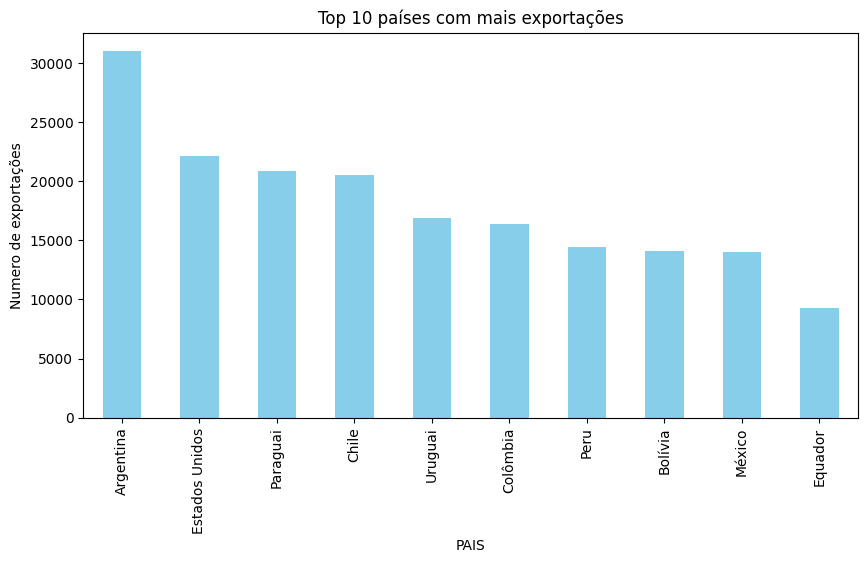

In [3]:
# Contar ocorrências
contagem_paises = df_mescla.PAIS.value_counts()

# Criar o gráfico
plt.figure(figsize=(10, 5))
contagem_paises.plot(kind='bar', color='skyblue')

# Personalizar o gráfico
plt.title('Top 10 países com mais exportações')
plt.xlabel('Países')
plt.ylabel('Numero de exportações')
plt.xticks(rotation=45)  # Rotacionar os nomes dos países para melhor visualização

contagem_paises.head(10).plot(kind='bar', color='skyblue')
plt.show()

Top 10 Países que mais recebem exportações do municipio de SÃO PAULO

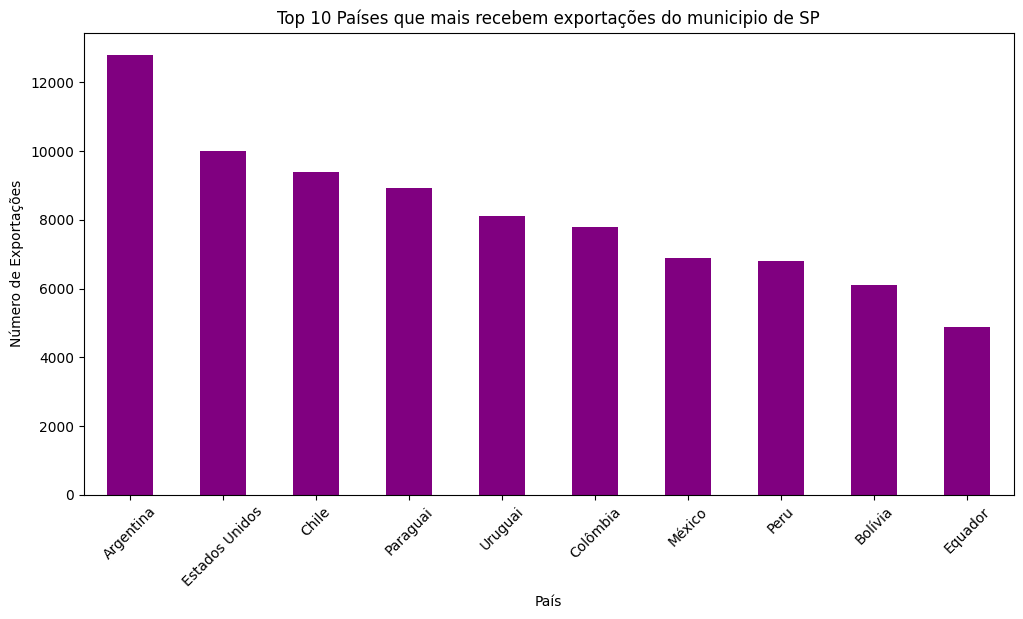

In [4]:
#os paises mais que mais exportam
muni = df_mescla.MUN.value_counts()

df_mescla["MUN"] = df_mescla["MUN"].str.upper().str.strip()
cidades_top = ["SAO PAULO", "CAMPINAS", "SAO BERNARDO DO CAMPO", "SOROCABA",
               "JUNDIAI", "GUARULHOS", "VINHEDO", "SAO JOSE DOS CAMPOS", "BARUERI", "INDAIATUBA"]
df_filtrado = df_mescla[df_mescla["MUN"].isin(cidades_top)]

# Contar o número de exportações por país
paises_exportacao = df_filtrado["PAIS"].value_counts()

# Filtrando os municípios
df_mescla["MUN"] = df_mescla["MUN"].str.upper().str.strip()
cidades_top = ["SAO PAULO", "CAMPINAS", "SAO BERNARDO DO CAMPO", "SOROCABA",
               "JUNDIAI", "GUARULHOS", "VINHEDO", "SAO JOSE DOS CAMPOS", "BARUERI", "INDAIATUBA"]
df_filtrado = df_mescla[df_mescla["MUN"].isin(cidades_top)]

# Contar o número de exportações por país
paises_exportacao = df_filtrado["PAIS"].value_counts()

# Selecionar os 10 países mais exportados
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='purple')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title("Top 10 Países que mais recebem exportações do municipio de SP")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


Declaração de dataframes

In [10]:
# Agrupar por município e SH4 (ITEM) e calcular a média do valor agregado de cada item no municipio
municipios_agregado = df_mescla.groupby(["MUN"])['VALOR_AGREGADO'].mean()

#mostrar top10 media de valor agregado por item/municipio
municipios_top10 = municipios_agregado.sort_values( ascending=False).head(10)

#display(municipios_agregado)


#top item valor acumulado por municipio
df_mescla['PRODUTO'] = df_mescla['PRODUTO'].str.slice(0, 30)

top_item = df_mescla.groupby(["PRODUTO"])['VALOR_AGREGADO'].sum()

top_item = top_item.sort_values(ascending=False).head(10)
#display(top_item)

#Municipior que mais exportam valor agregado
top_municipio = df_mescla.groupby(["MUN"])['VALOR_AGREGADO'].sum()
top_municipio = top_municipio.sort_values(ascending=False).head(10)



#ILHA BELA VALOR AGREGADO DE EXPORTAÇÃO
#ilha_bela = df_mescla[df_mescla["MUN"] == "ILHABELA"]
#ilha_bela = ilha_bela.groupby(["MUN", "UF", "PRODUTO"])['VALOR_AGREGADO'].sum()
#display(ilha_bela)

Top 10 Municípios com Maior Somatoria de Valor Agregado

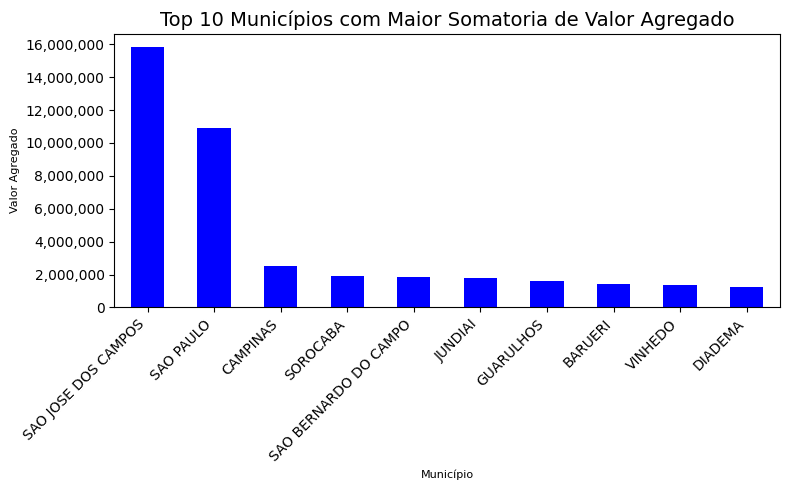

In [19]:
# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
top_municipio.plot(kind="bar", color="blue")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Somatoria de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=8)
plt.ylabel("Valor Agregado", fontsize=8)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

#Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()








Top 10 Municípios com Maior Media de Valor Agregado

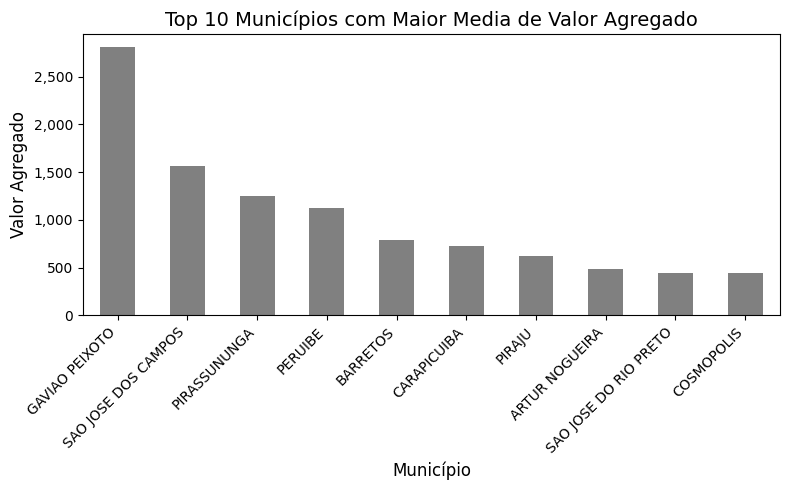

In [17]:
# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
municipios_top10.plot(kind="bar", color="grey")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Media de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

Top 10 Municípios com Maior Media de Valor Agregado

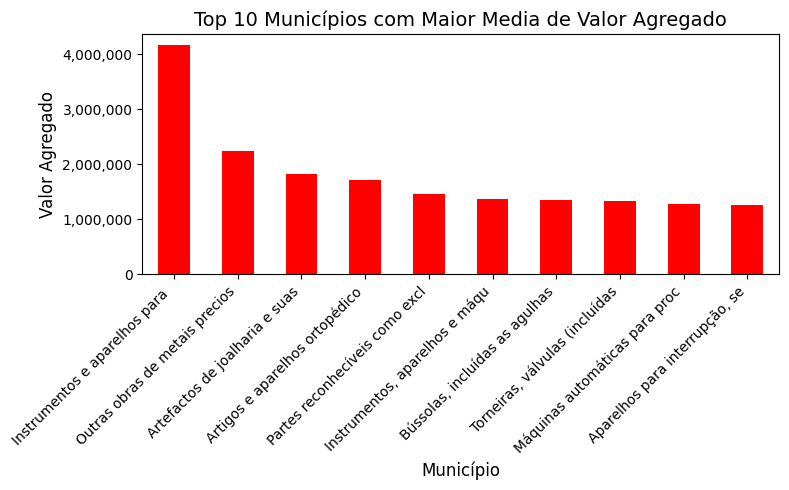

In [15]:
# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
top_item.plot(kind="bar", color="red")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Media de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

TOP 10 Produtos Exportados em SÃO JOSÉ DOS CAMPOS

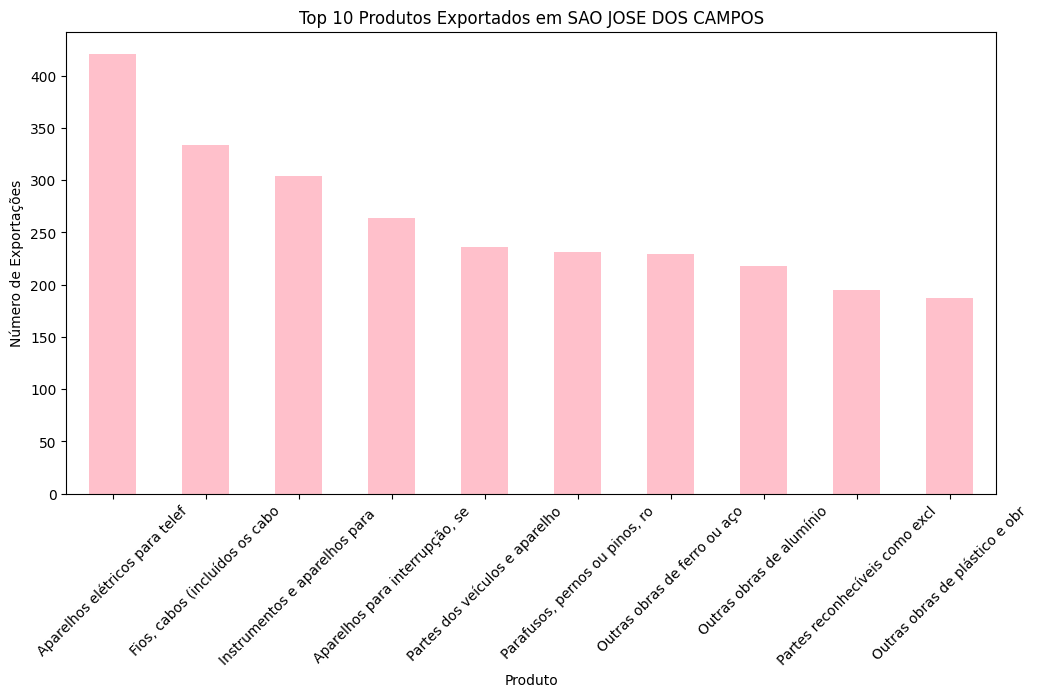

In [14]:
municipio_sjc = 'SAO JOSE DOS CAMPOS'

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_sjc.upper()]

# Contar o número de ocorrências de cada produto
df_produtos = df_municipio["PRODUTO"].value_counts()

# Selecionar os 10 produtos mais exportados
top_10_produtos = df_produtos.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_produtos.plot(kind='bar', color='pink')

# Personalizar o gráfico
plt.xlabel("Produto")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Produtos Exportados em {municipio_sjc}")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()